In [1]:
!pip3 install -U ucimlrepo 

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [3]:
# importing the data directly from the from UCI repository as instructed on the site
from ucimlrepo import fetch_ucirepo 
  
# fetching the dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

In [4]:
# previewing the dataframes
X

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
y

,Diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [6]:
# the feature 'Diagnosis' is in a separate dataframe, so I am going to combine both dataframes
# 'Diagnosis' will be the first column of the new dataframe 'df'
# there is no ID number in the loaded dataframe, which is fine because I would have to remove it anyway
df = pd.concat([y['Diagnosis'], X], axis=1)
df

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
# displaying the number of features and values
values, features = df.shape
print(f'Features: {features}')
print(f'Values: {values}')

#corresponds to the numbers stated in the paper

Features: 31
Values: 569


In [8]:
# displaying column names
df.columns.values

array(['Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1',
       'smoothness1', 'compactness1', 'concavity1', 'concave_points1',
       'symmetry1', 'fractal_dimension1', 'radius2', 'texture2',
       'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2',
       'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3',
       'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3',
       'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3'],
      dtype=object)

In [9]:
# checking all data types
df.dtypes

Diagnosis              object
radius1               float64
texture1              float64
perimeter1            float64
area1                 float64
smoothness1           float64
compactness1          float64
concavity1            float64
concave_points1       float64
symmetry1             float64
fractal_dimension1    float64
radius2               float64
texture2              float64
perimeter2            float64
area2                 float64
smoothness2           float64
compactness2          float64
concavity2            float64
concave_points2       float64
symmetry2             float64
fractal_dimension2    float64
radius3               float64
texture3              float64
perimeter3            float64
area3                 float64
smoothness3           float64
compactness3          float64
concavity3            float64
concave_points3       float64
symmetry3             float64
fractal_dimension3    float64
dtype: object

In [10]:
# changing the non-numerical values of the feature 'Diagnosis' to numerical values using LabelEncoder
label_encoder = LabelEncoder()
df['Diagnosis'] = label_encoder.fit_transform(df['Diagnosis'])

df.dtypes

Diagnosis               int32
radius1               float64
texture1              float64
perimeter1            float64
area1                 float64
smoothness1           float64
compactness1          float64
concavity1            float64
concave_points1       float64
symmetry1             float64
fractal_dimension1    float64
radius2               float64
texture2              float64
perimeter2            float64
area2                 float64
smoothness2           float64
compactness2          float64
concavity2            float64
concave_points2       float64
symmetry2             float64
fractal_dimension2    float64
radius3               float64
texture3              float64
perimeter3            float64
area3                 float64
smoothness3           float64
compactness3          float64
concavity3            float64
concave_points3       float64
symmetry3             float64
fractal_dimension3    float64
dtype: object

In [11]:
# checking for missing values
df.isnull().sum()

Diagnosis             0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

In [12]:
# checking for monotonous attributes
df.nunique()

# there are no monotonous attributes

Diagnosis               2
radius1               456
texture1              479
perimeter1            522
area1                 539
smoothness1           474
compactness1          537
concavity1            537
concave_points1       542
symmetry1             432
fractal_dimension1    499
radius2               540
texture2              519
perimeter2            533
area2                 528
smoothness2           547
compactness2          541
concavity2            533
concave_points2       507
symmetry2             498
fractal_dimension2    545
radius3               457
texture3              511
perimeter3            514
area3                 544
smoothness3           411
compactness3          529
concavity3            539
concave_points3       492
symmetry3             500
fractal_dimension3    535
dtype: int64

In [13]:
# displaying descriptive data statistics
df.describe()

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [14]:
# displaying the entries where the diagnosis is malignant (1)
df[df.Diagnosis == 1]

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,1,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


In [15]:
#displaying the entries where the diagnosis is benign (0)
df[df.Diagnosis == 0]

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
19,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,0,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,0,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,0,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
559,0,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
560,0,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
561,0,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


In [16]:
# displaying the mean values of the first measurment for all benign (0) and malignant (1) diagnoses
df[['Diagnosis','radius1','texture1','perimeter1','area1','smoothness1','compactness1','concavity1','concave_points1','symmetry1','fractal_dimension1']].groupby(['Diagnosis'], as_index=False).mean()

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1
0,0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867
1,1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680


In [17]:
# displaying the mean values of the second measurment for all benign (0) and malignant (1) diagnoses
df[['Diagnosis', 'radius2','texture2','perimeter2','area2','smoothness2','compactness2','concavity2','concave_points2','symmetry2','fractal_dimension2']].groupby(['Diagnosis'], as_index=False).mean()

,Diagnosis,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2
0,0,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636
1,1,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062


In [18]:
# displaying the mean values of the third measurment for all benign (0) and malignant (1) diagnoses
df[['Diagnosis', 'radius3','texture3','perimeter3','area3','smoothness3','compactness3','concavity3','concave_points3','symmetry3','fractal_dimension3']].groupby(['Diagnosis'], as_index=False).mean()

,Diagnosis,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,0,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,1,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


Text(0, 0.5, 'count')

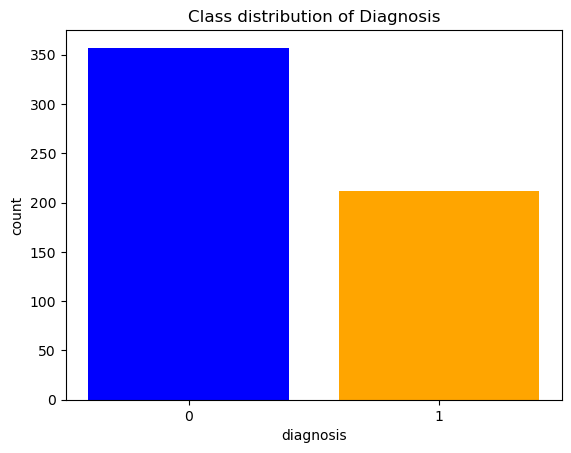

In [19]:
# Figure 1. from the paper
# Class distribution of Diagnosis - bar chart

value_counts = df['Diagnosis'].value_counts()
plt.bar(value_counts.index, value_counts, color=['blue', 'orange'])
plt.title('Class distribution of Diagnosis')
plt.xlabel('diagnosis')
plt.xticks(value_counts.index)
plt.ylabel('count')

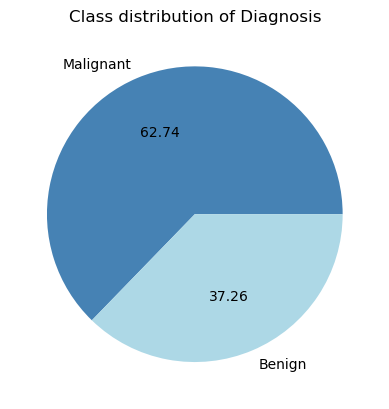

In [20]:
# Class distribution of Diagnosis - pie chart

value_counts = df['Diagnosis'].value_counts()
plt.pie(value_counts, labels=['Malignant', 'Benign'], colors=['steelblue', 'lightblue'], autopct='%.2f')
plt.title('Class distribution of Diagnosis')
plt.show()

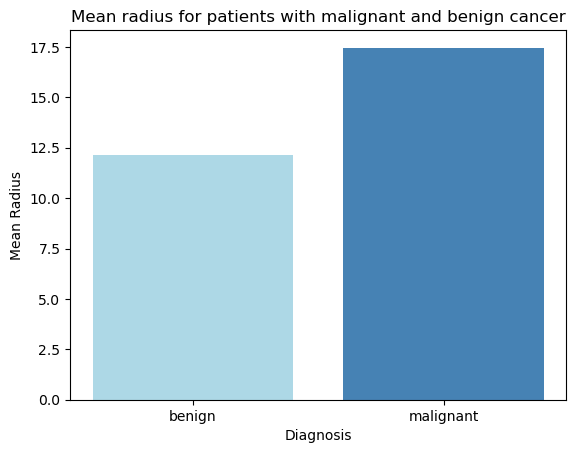

In [21]:
# creating a bar chart to compare a specific feature (radius1) for patients with malignant (1) and benign (0) cancer

malignant = df[df['Diagnosis'] == 1]['radius1']
benign = df[df['Diagnosis'] == 0]['radius1']

#bar chart
plt.bar([1, 0], [malignant.mean(), benign.mean()], color=['steelblue', 'lightblue'])
plt.xticks([1, 0], ['malignant', 'benign'])
plt.title('Mean radius for patients with malignant and benign cancer')
plt.xlabel('Diagnosis')
plt.ylabel('Mean Radius')
plt.show()

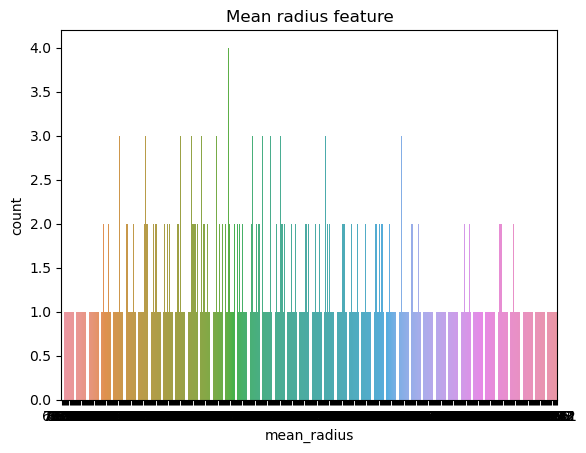

In [22]:
# Figure 2 from the paper (Mean radius feature)
# counter-plotting the mean radius feature of the dataset 

sns.countplot(x='radius1', data=df)
plt.title(f'Mean radius feature')
plt.xlabel('mean_radius')
plt.ylabel('count')
plt.show()

In [23]:
# creating 3 subsets corresponding to 3 measurements (mean, standard deviation, mean of worst) of the ten features
# each subset will contain the 'Diagnosis' column

subset_mean = ['Diagnosis', 'radius1','texture1','perimeter1','area1','smoothness1','compactness1','concavity1','concave_points1','symmetry1','fractal_dimension1']
subset_se = ['Diagnosis', 'radius2','texture2','perimeter2','area2','smoothness2','compactness2','concavity2','concave_points2','symmetry2','fractal_dimension2']
subset_worst = ['Diagnosis', 'radius3','texture3','perimeter3','area3','smoothness3','compactness3','concavity3','concave_points3','symmetry3','fractal_dimension3']

print(subset_mean)
print(subset_se)
print(subset_worst)

['Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1']
['Diagnosis', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2']
['Diagnosis', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']


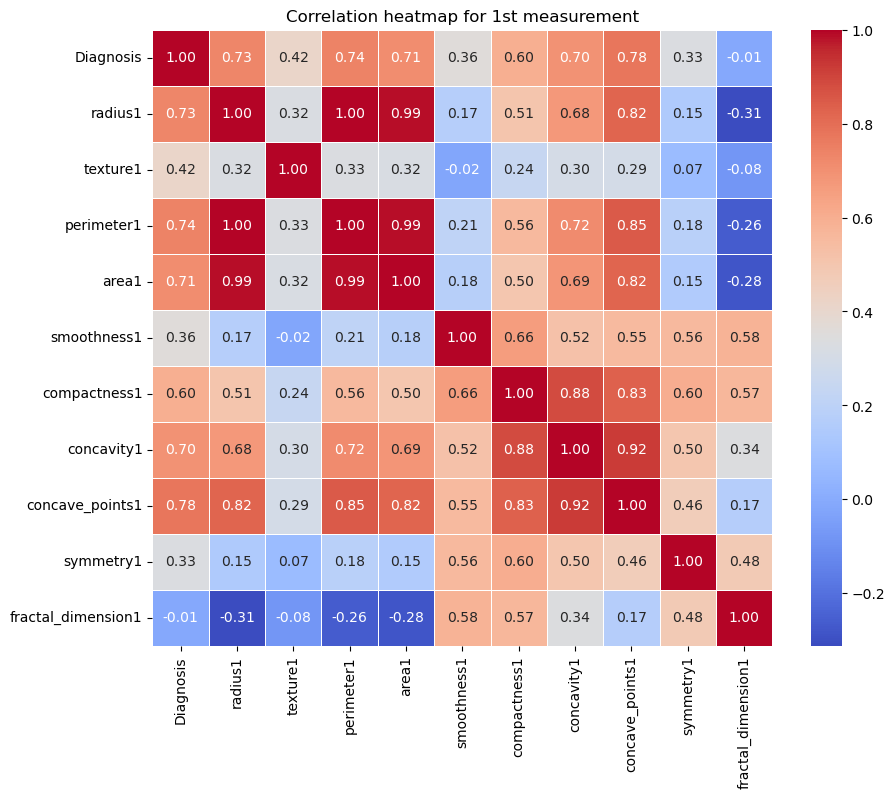

In [24]:
# Figure 3 from the paper (Correlation between the different features)
# creating a heatmap to show the correlation between the features of the first measurement

first_measurement = df[subset_mean]

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(first_measurement.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation heatmap for 1st measurement')
plt.show()

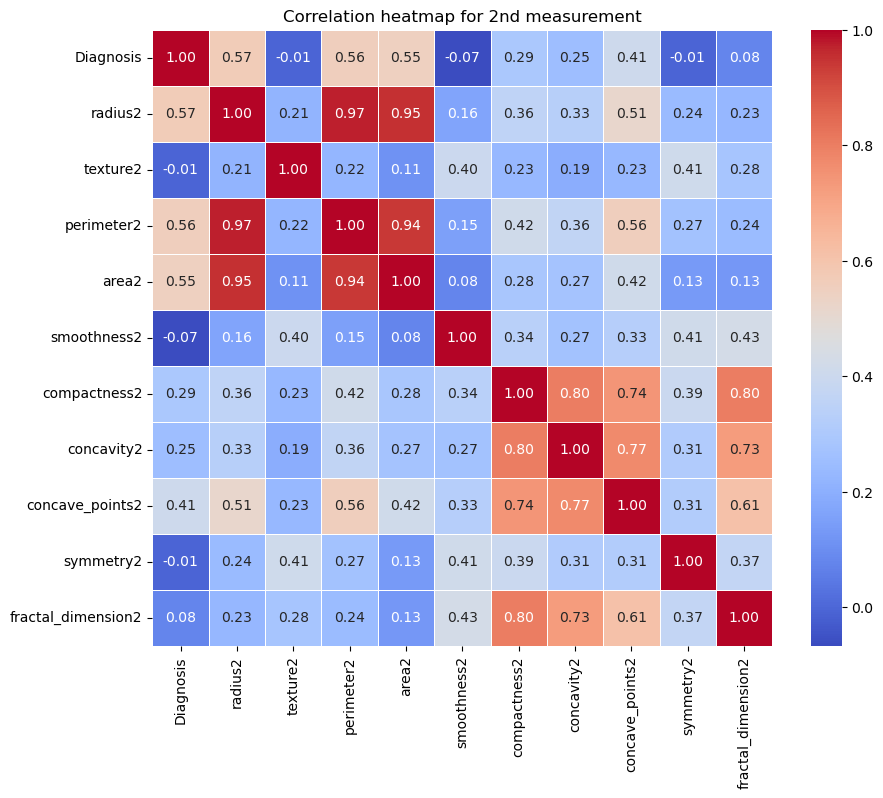

In [25]:
# creating a heatmap to show the correlation between the features of the second measurement

second_measurement = df[subset_se]

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(second_measurement.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation heatmap for 2nd measurement')
plt.show()

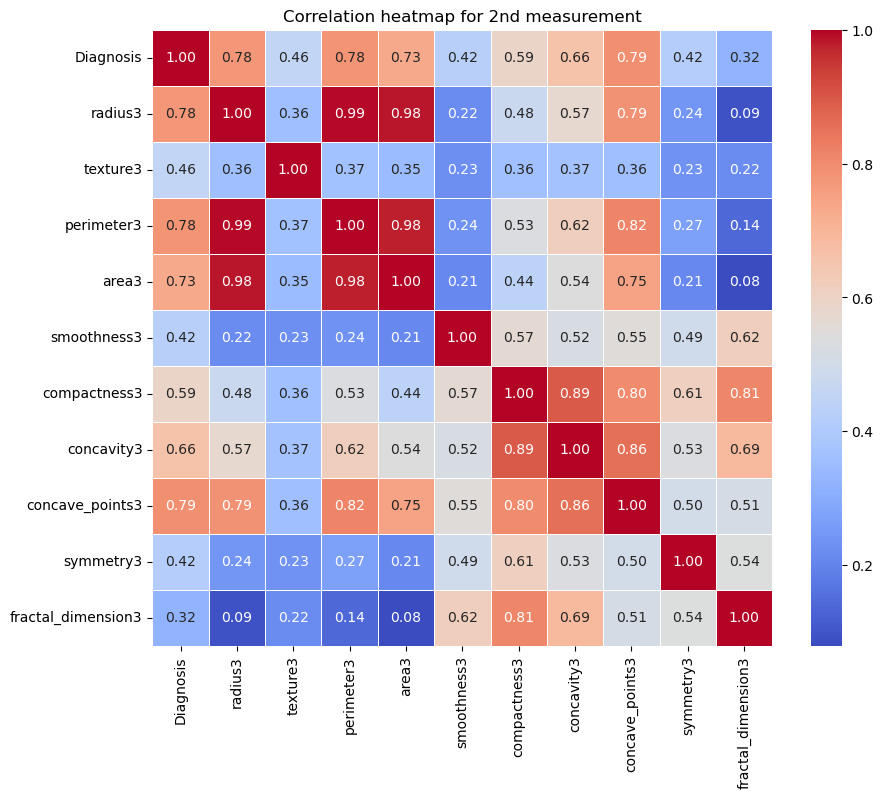

In [26]:
# creating a heatmap to show the correlation between the features of the third measurement

third_measurement = df[subset_worst]

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(third_measurement.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation heatmap for 2nd measurement')
plt.show()

In [27]:
# I will also use the subsets without the 'Diagnosis' feature

subset_mean2 = ['radius1','texture1','perimeter1','area1','smoothness1','compactness1','concavity1','concave_points1','symmetry1','fractal_dimension1']
subset_se2 = ['radius2','texture2','perimeter2','area2','smoothness2','compactness2','concavity2','concave_points2','symmetry2','fractal_dimension2']
subset_worst2 = ['radius3','texture3','perimeter3','area3','smoothness3','compactness3','concavity3','concave_points3','symmetry3','fractal_dimension3']

print(subset_mean2)
print(subset_se2)
print(subset_worst2)

['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1']
['radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2']
['radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']


C:\Users\Mirta\AppData\Local\Temp\ipykernel_12864\2557881211.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[subset_mean2].hist(ax=axes[0], bins=20, color='purple', edgecolor='black', grid=False)


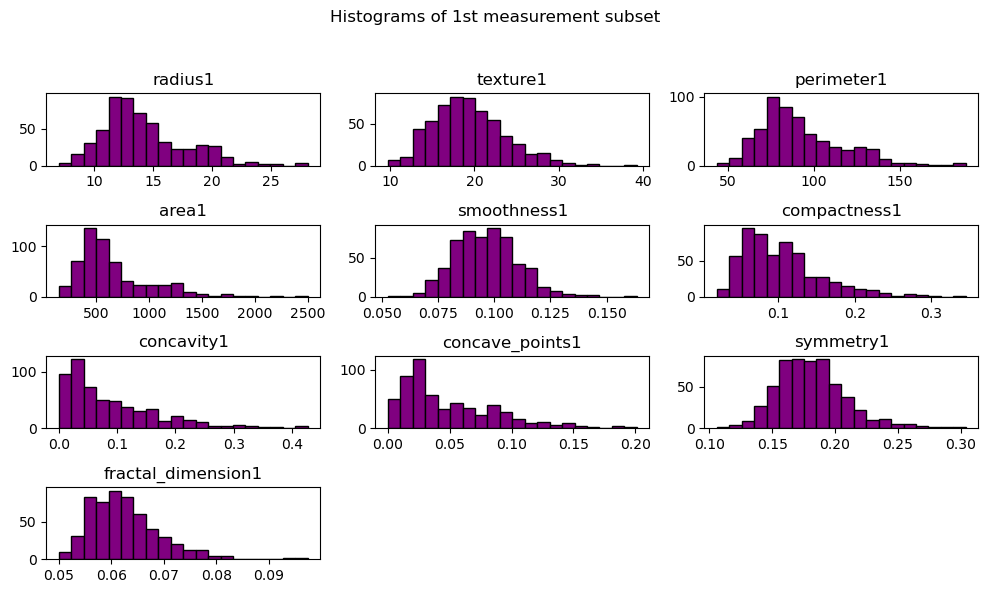

In [28]:
# creating histograms of features

# Histograms of the first measurement subset
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))

df[subset_mean2].hist(ax=axes[0], bins=20, color='purple', edgecolor='black', grid=False)
fig.suptitle('Histograms of 1st measurement subset')

#layout adjustment
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

C:\Users\Mirta\AppData\Local\Temp\ipykernel_12864\3678000028.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[subset_se2].hist(ax=axes[1], bins=20, color='orchid', edgecolor='black', grid=False)


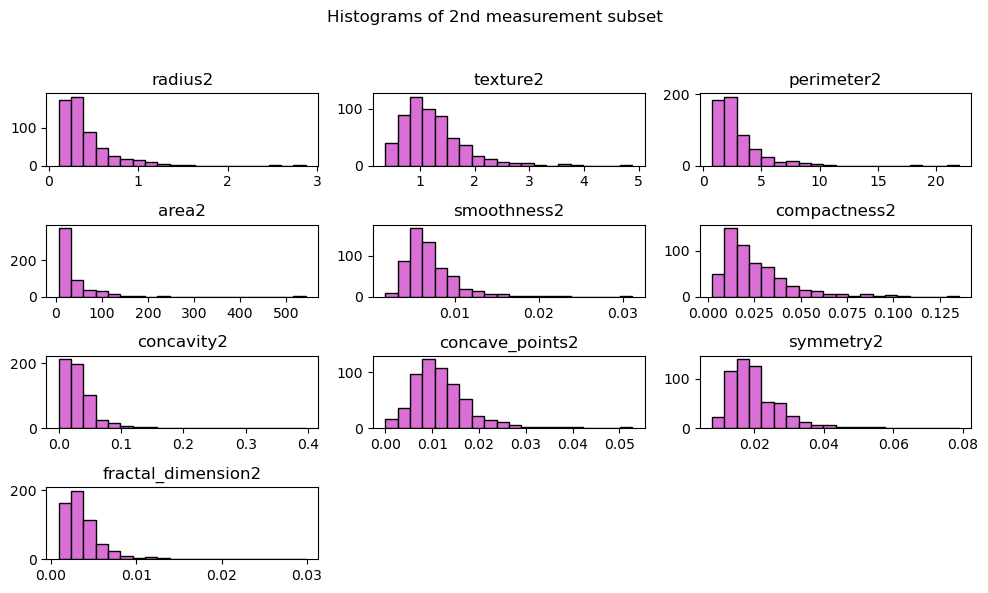

In [29]:
# Histograms of the second measurement subset

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))

df[subset_se2].hist(ax=axes[1], bins=20, color='orchid', edgecolor='black', grid=False)
fig.suptitle('Histograms of 2nd measurement subset')

#layout adjustment
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

C:\Users\Mirta\AppData\Local\Temp\ipykernel_12864\1465302321.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[subset_worst2].hist(ax=axes[2], bins=20, color='plum', edgecolor='black', grid=False)


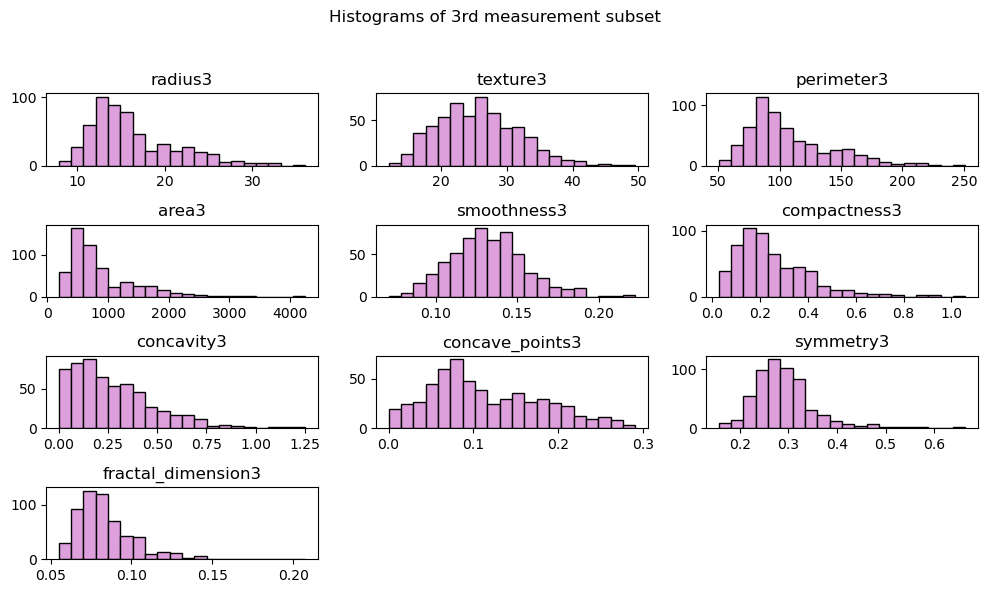

In [30]:
# Histograms of the third measurement subset

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))

df[subset_worst2].hist(ax=axes[2], bins=20, color='plum', edgecolor='black', grid=False)
fig.suptitle('Histograms of 3rd measurement subset')

#layout adjustment
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


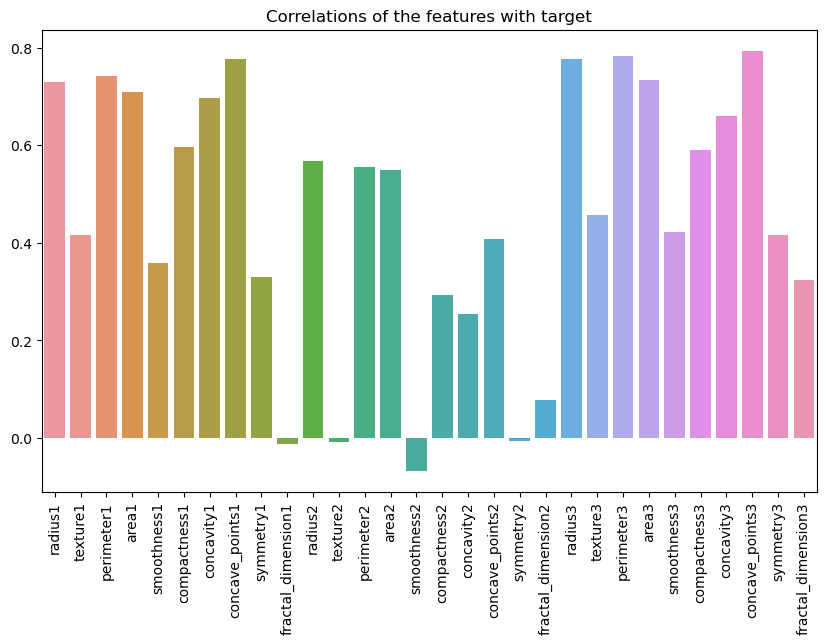

In [31]:
# Figure 4 from the paper (Correlations of the feature with target)

# a barplot displaying the correlation between each feature and the diagnosis (the target)
diagnosis_correlation = df.corr()['Diagnosis'].drop('Diagnosis')
plt.figure(figsize=(10, 6))  
sns.barplot(x=diagnosis_correlation.index, y=diagnosis_correlation.values)
plt.title('Correlations of the features with target')
plt.xticks(rotation=90)  
plt.show()

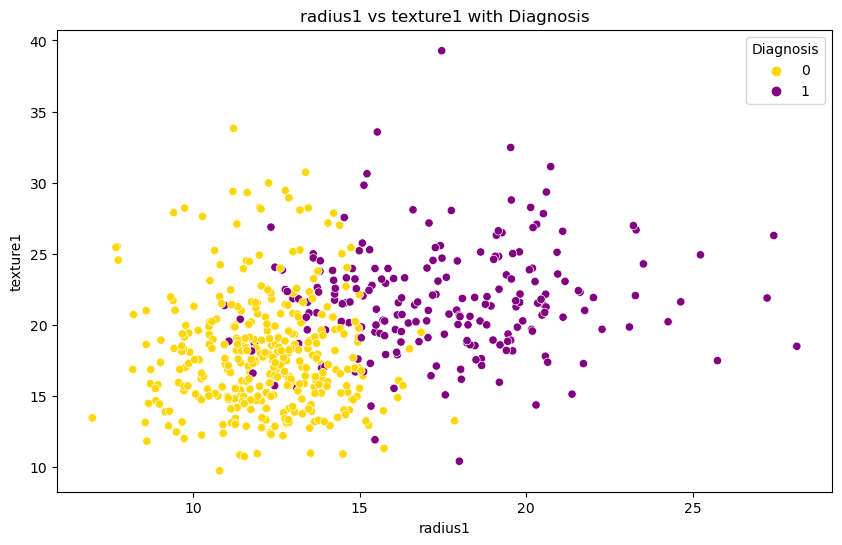

In [32]:
# creating a scatter plot to observe the relationship between two specific features with respect to diagnosis

plt.figure(figsize=(10, 6))  
sns.scatterplot(x='radius1', y='texture1', hue='Diagnosis', data=df, palette={0:'gold', 1:'purple'})
plt.title('radius1 vs texture1 with Diagnosis')
plt.xlabel('radius1')
plt.ylabel('texture1')
plt.show()

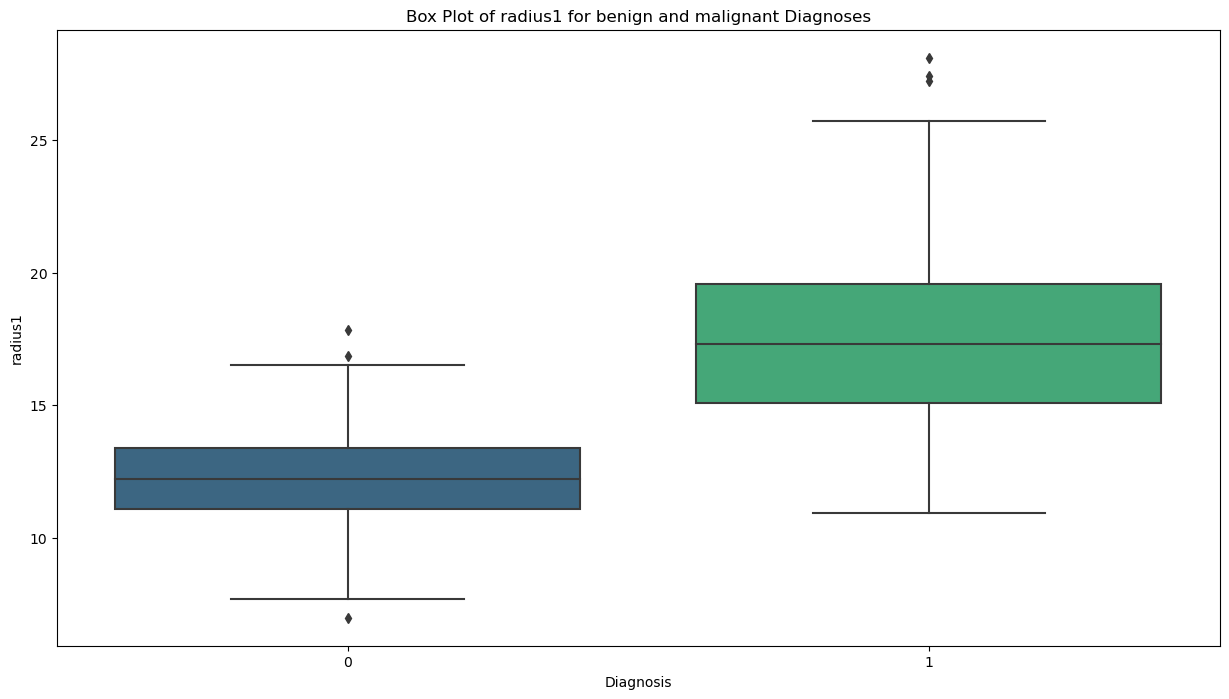

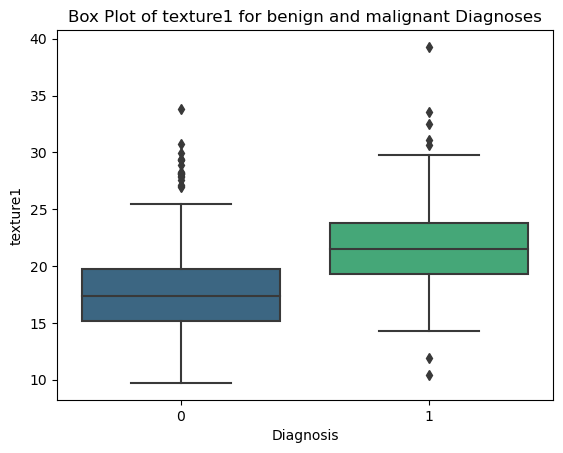

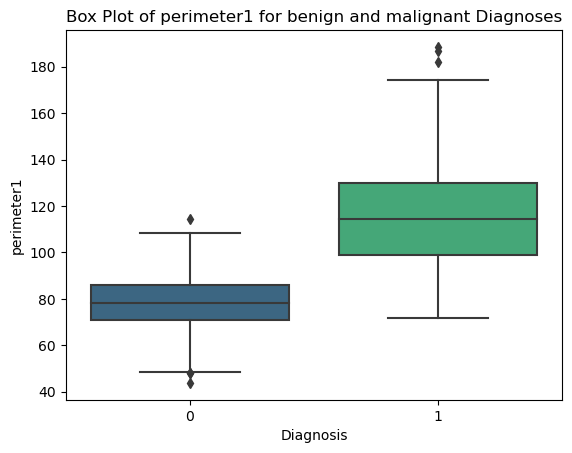

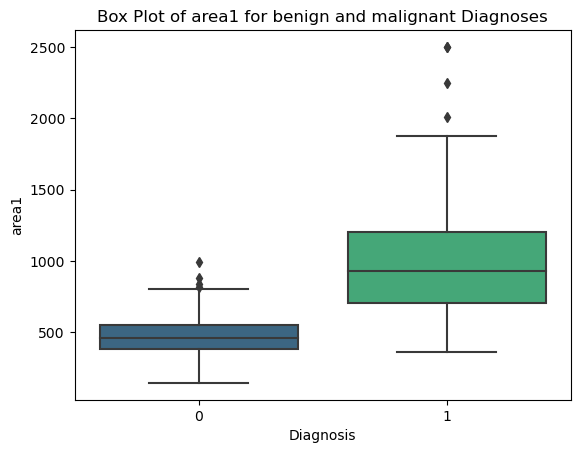

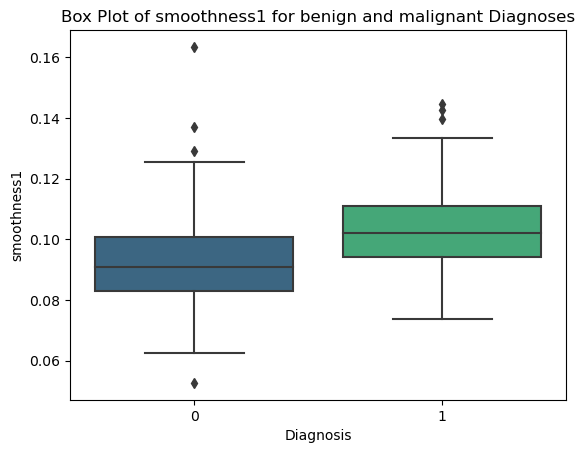

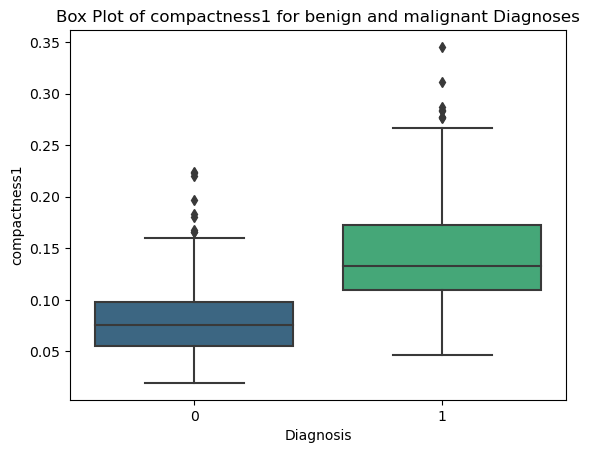

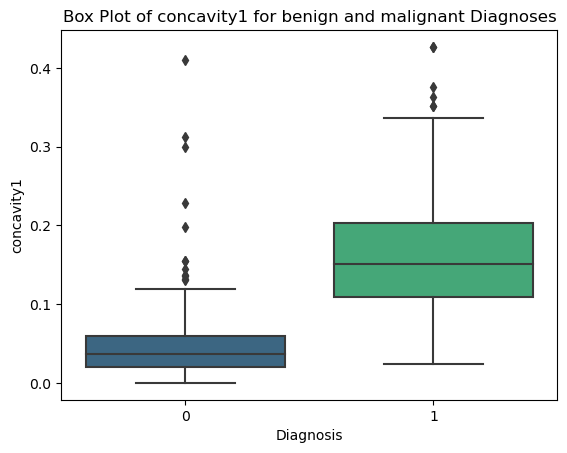

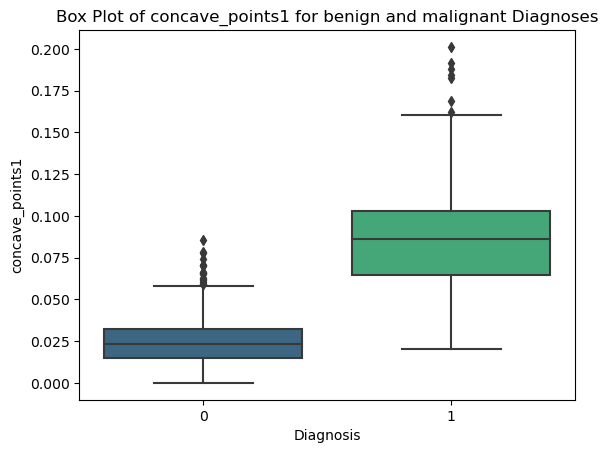

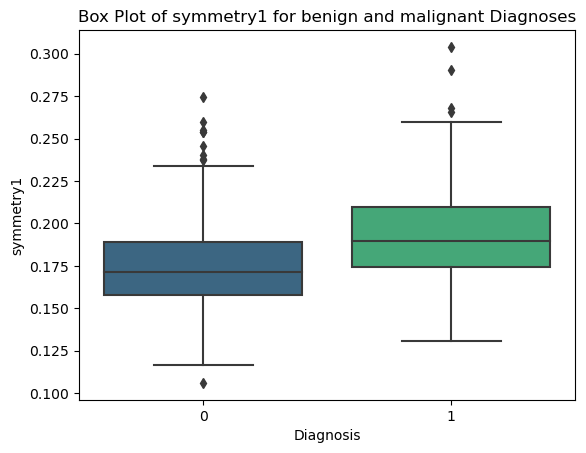

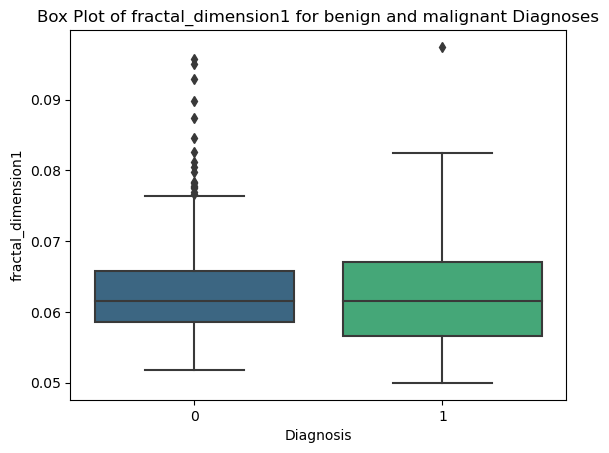

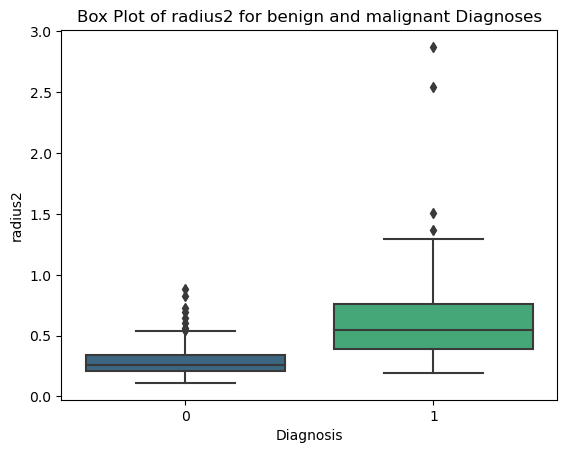

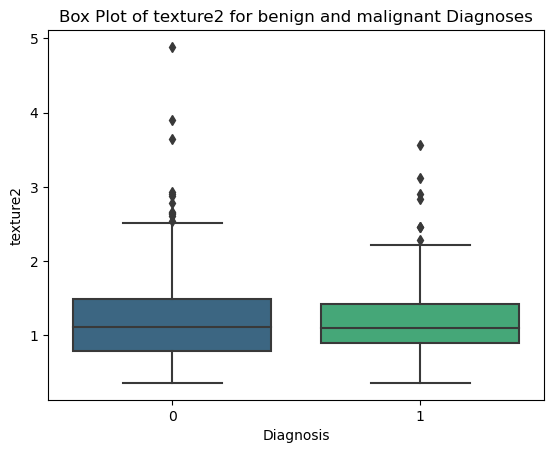

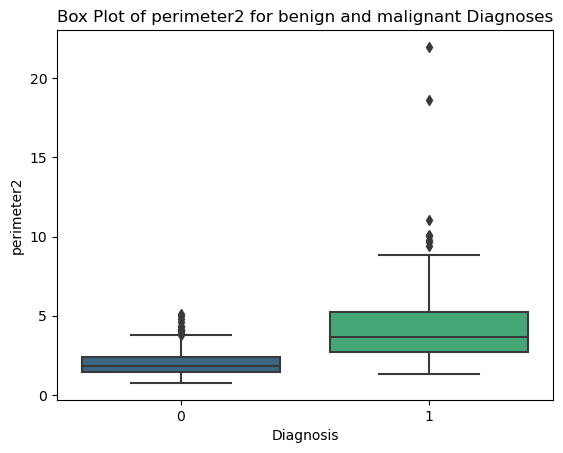

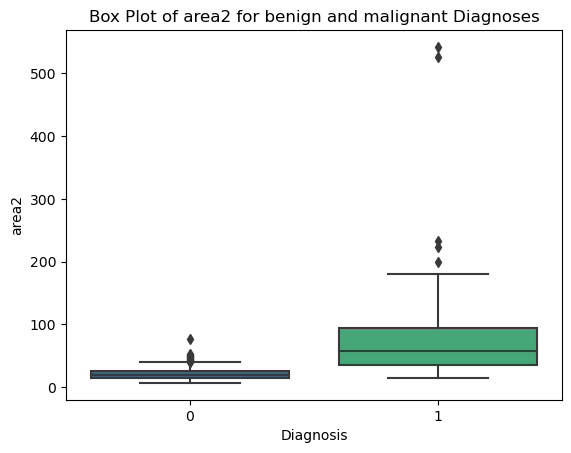

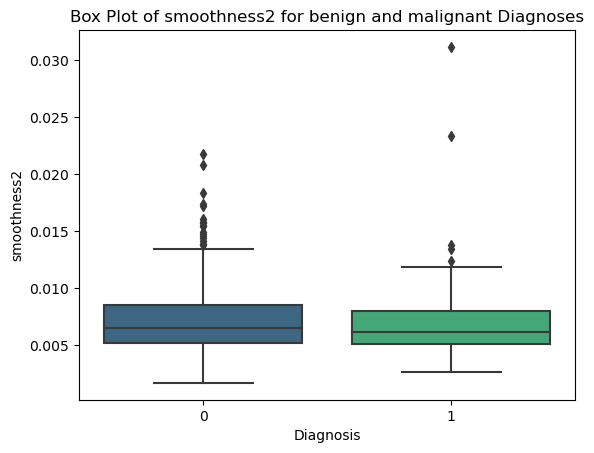

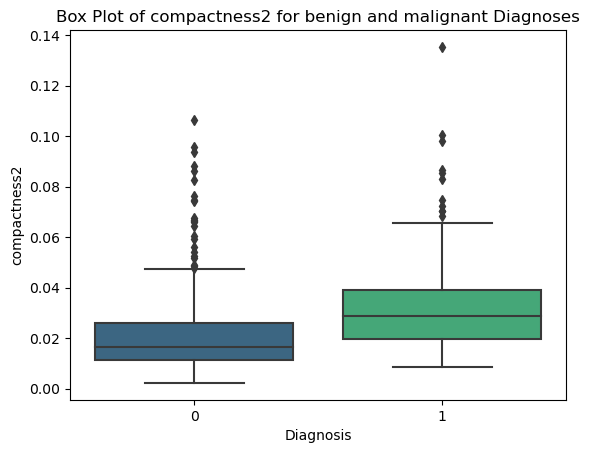

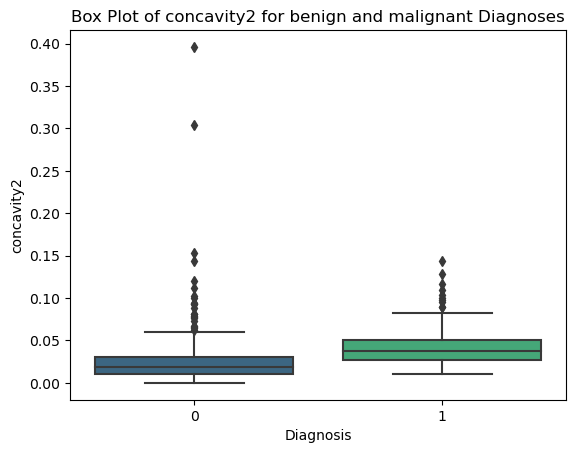

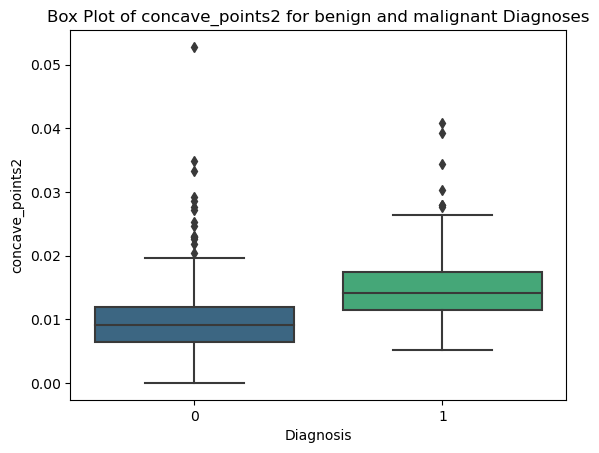

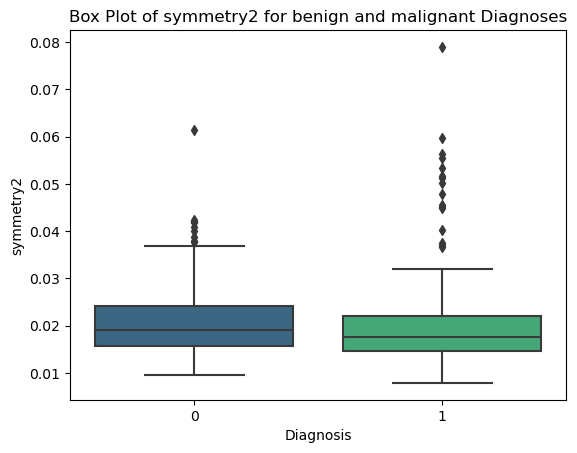

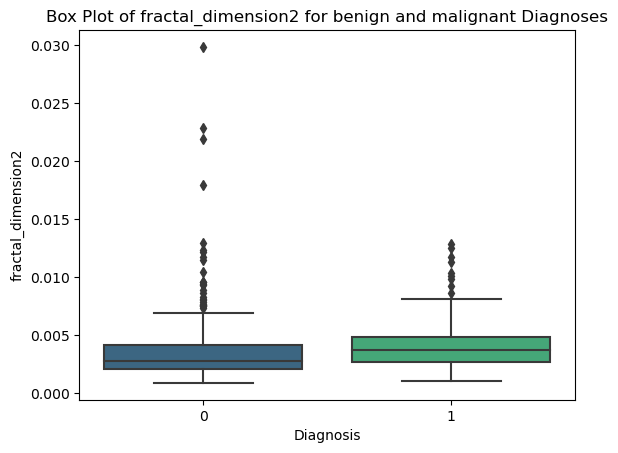

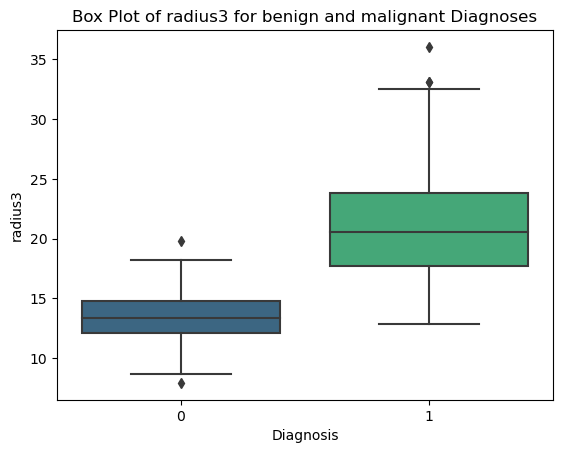

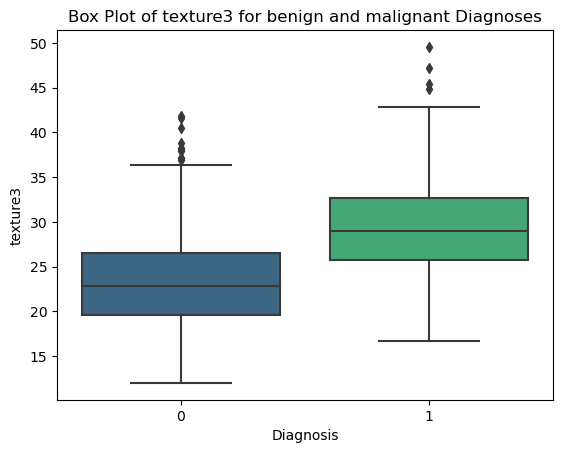

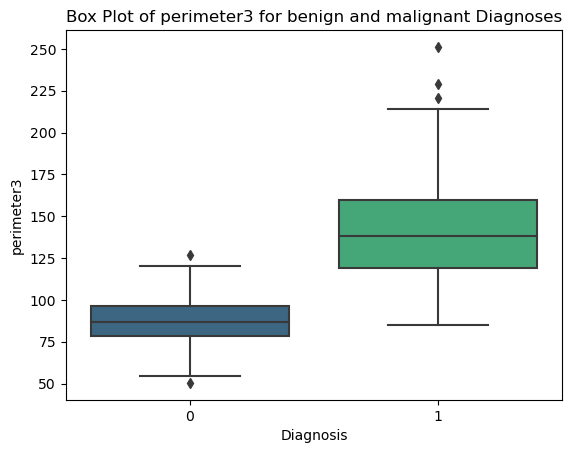

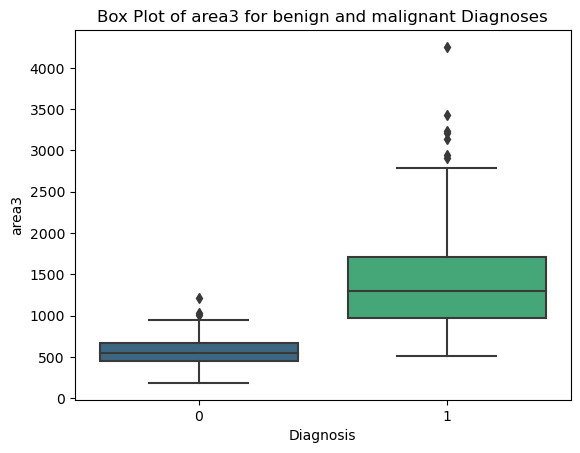

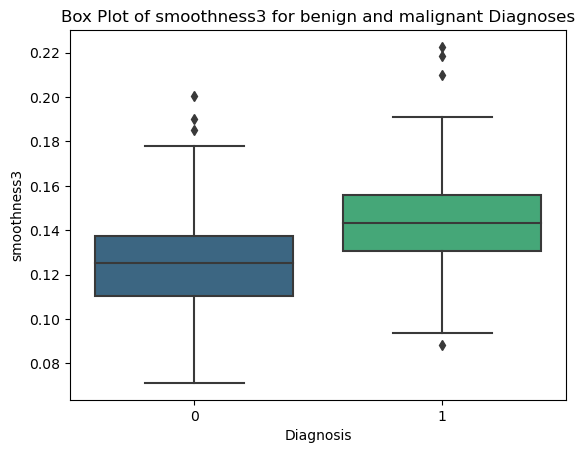

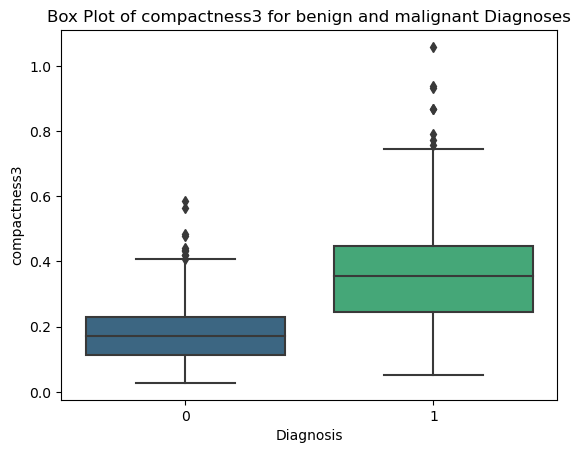

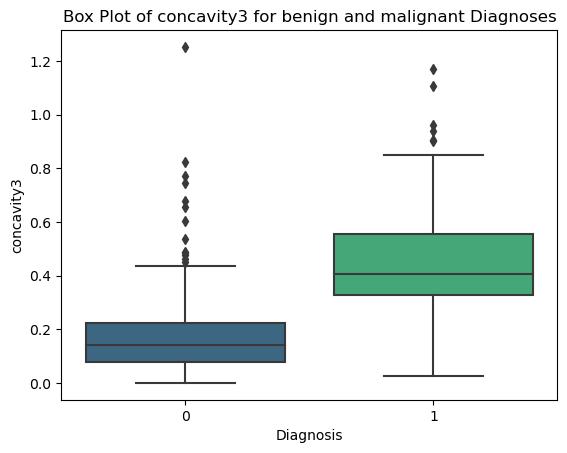

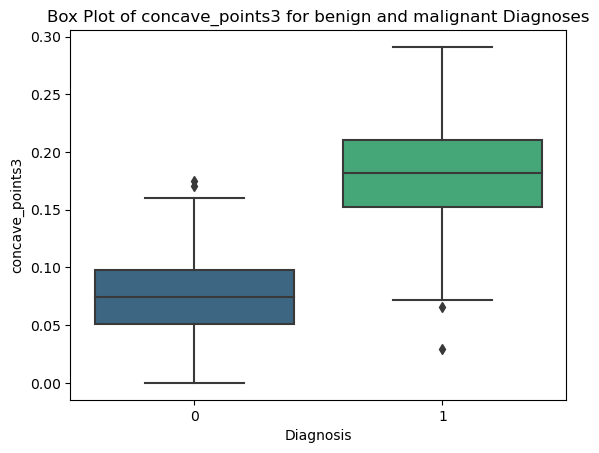

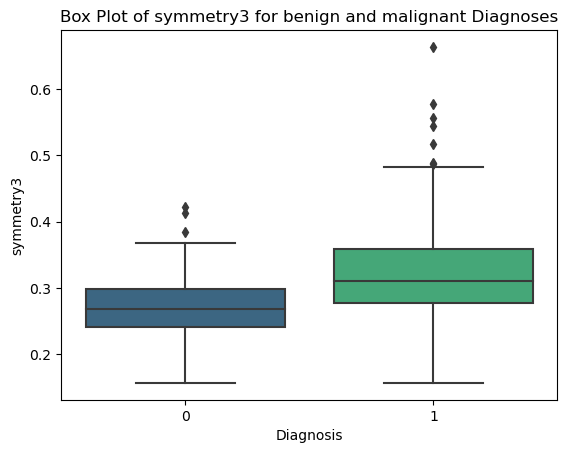

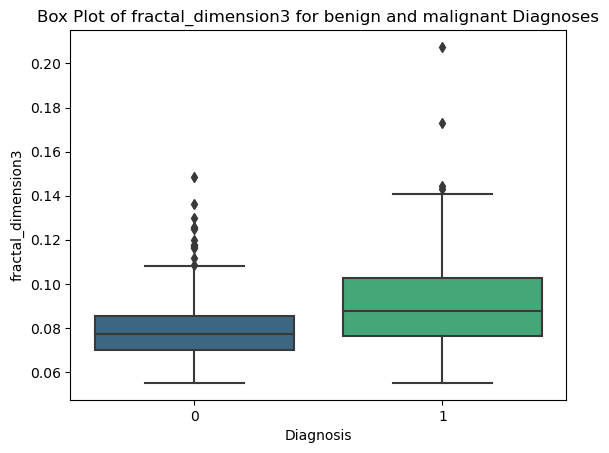

In [33]:
# creating box plots for all the features, comparing the distribution of values for benign and malignant diagnoses 

features_to_plot = df.columns[df.columns != 'Diagnosis'] # excluding 'Diagnosis' feature
plt.figure(figsize=(15, 8))
for feature in features_to_plot:
    sns.boxplot(x='Diagnosis', y=feature, data=df, palette='viridis')
    plt.title(f'Box Plot of {feature} for benign and malignant Diagnoses')
    plt.show()

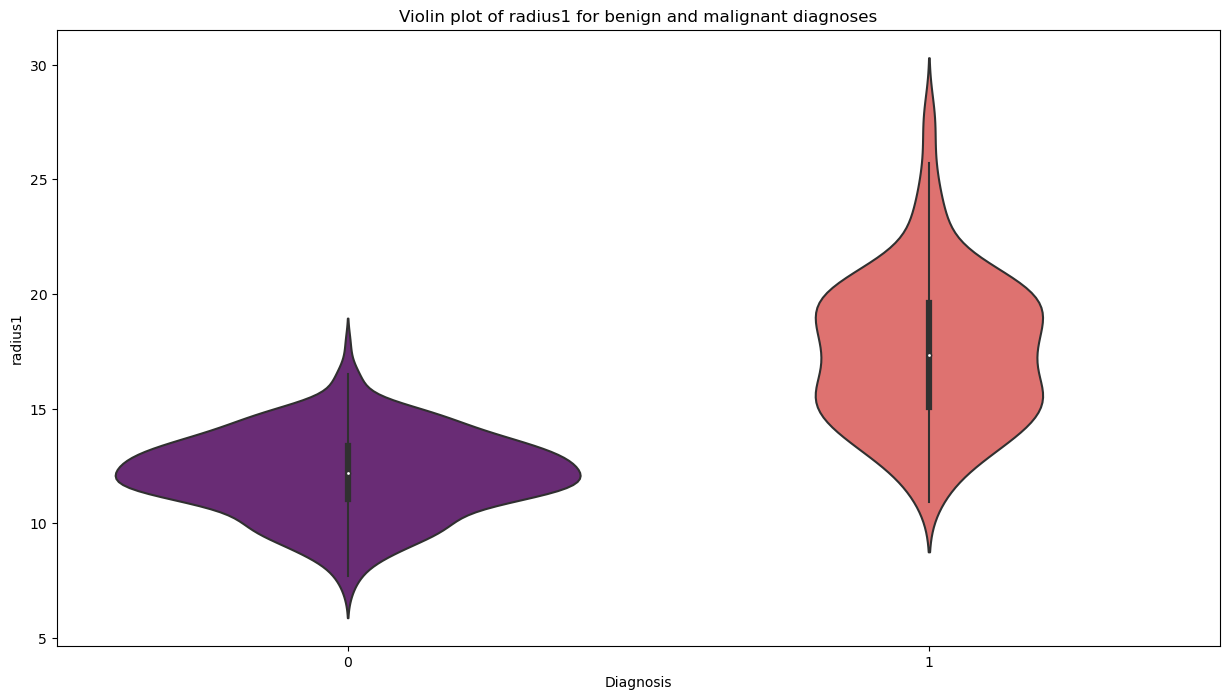

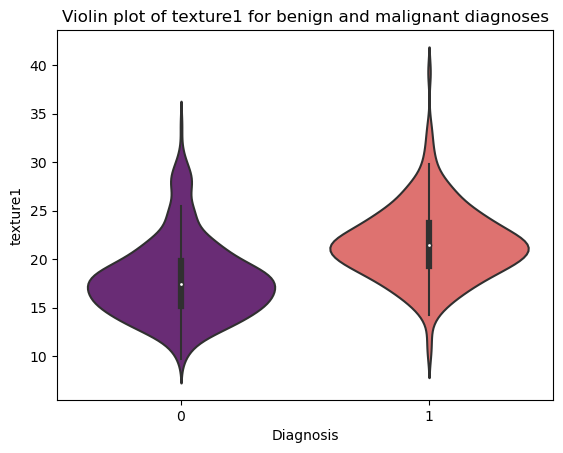

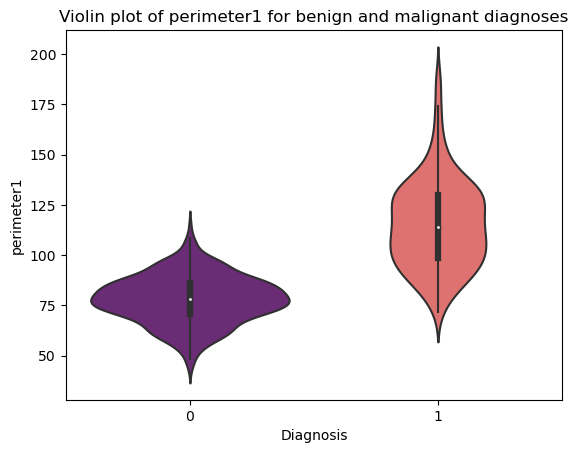

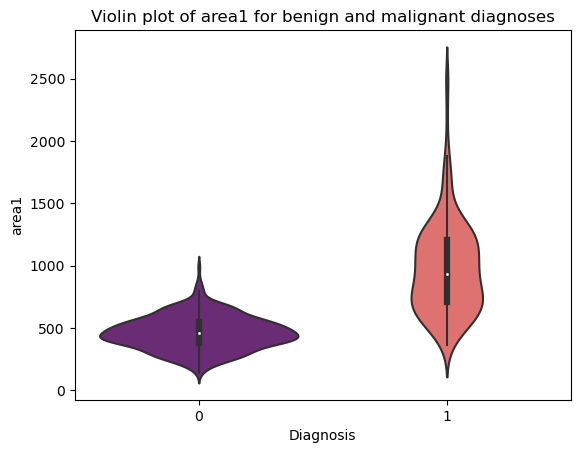

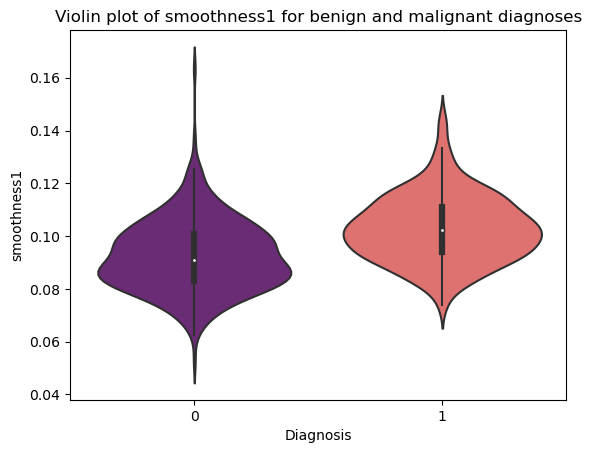

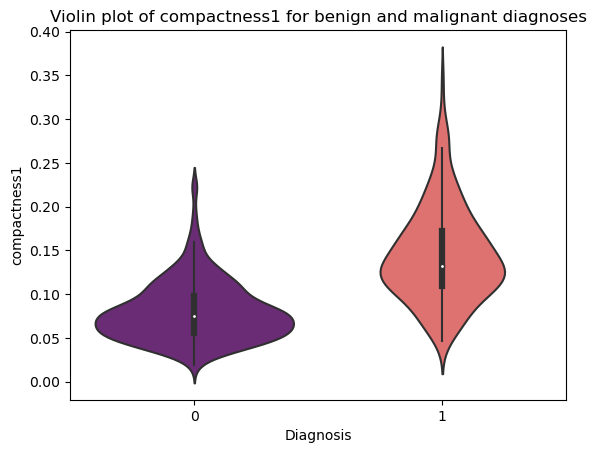

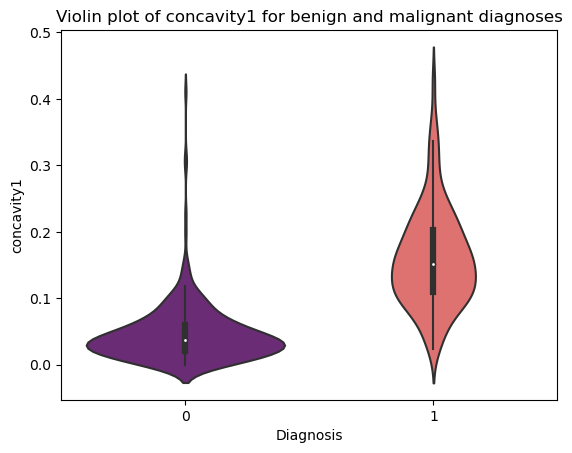

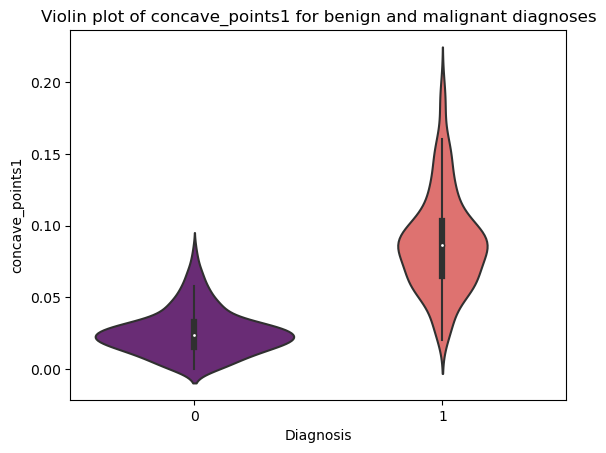

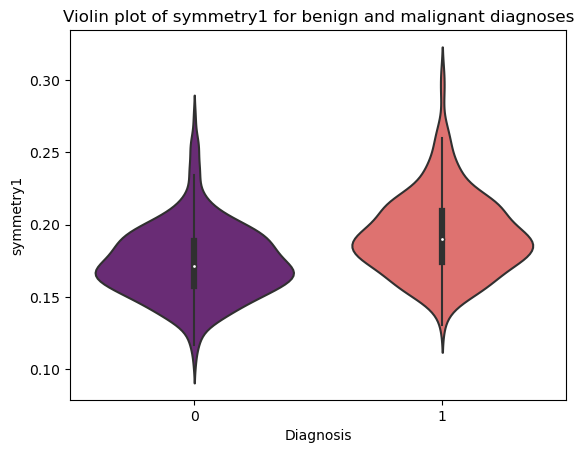

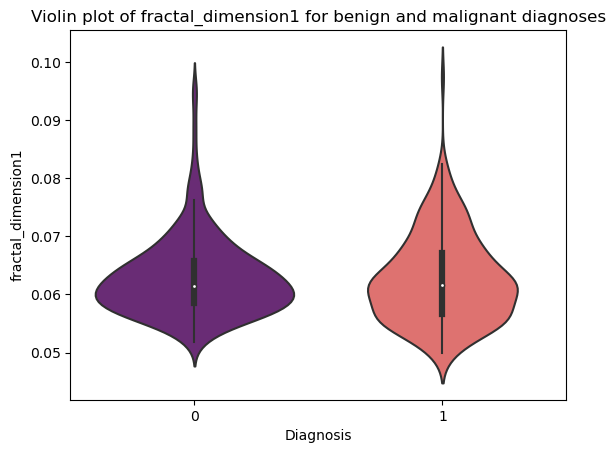

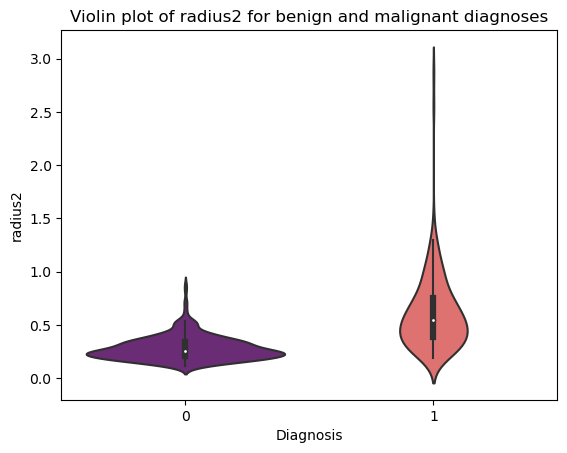

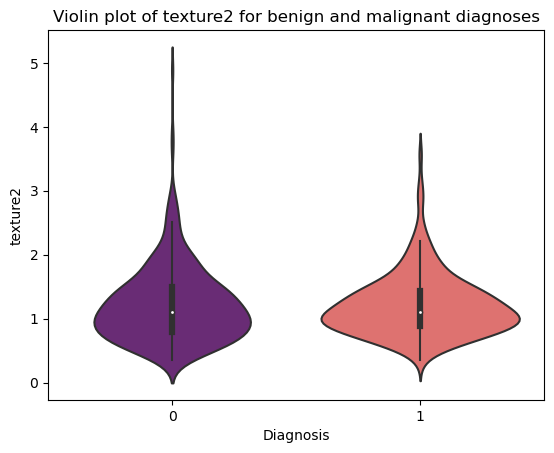

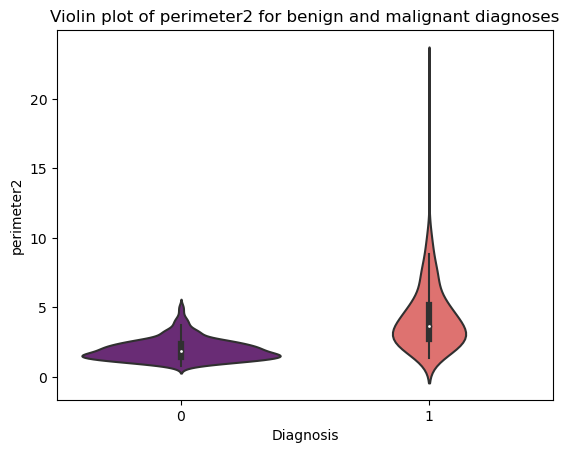

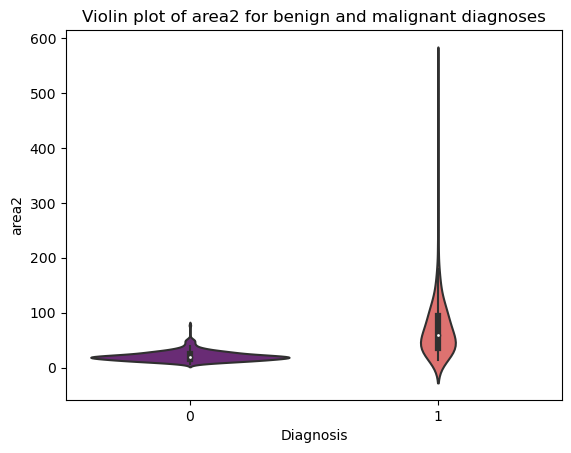

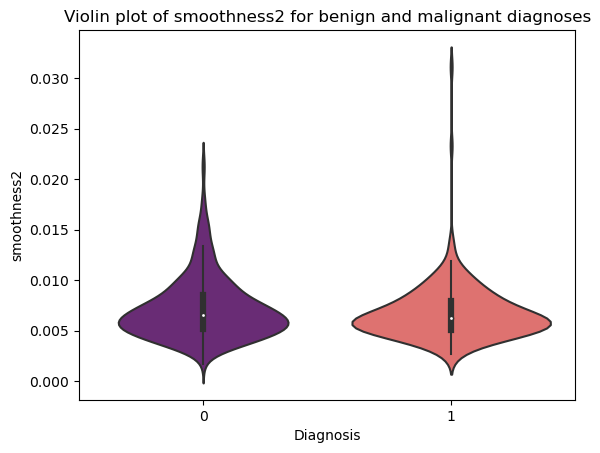

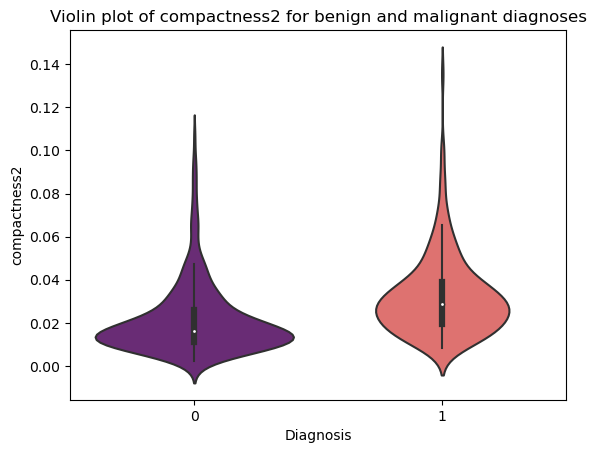

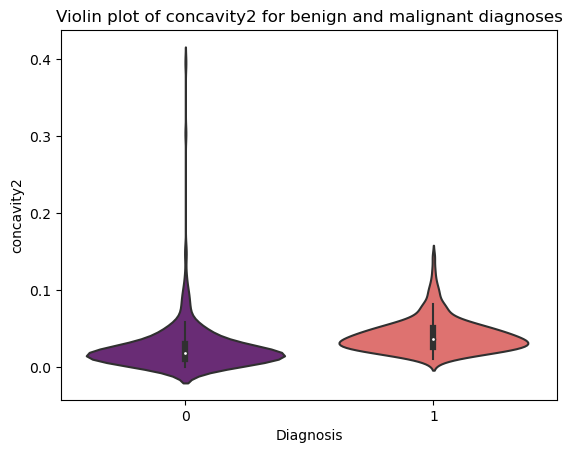

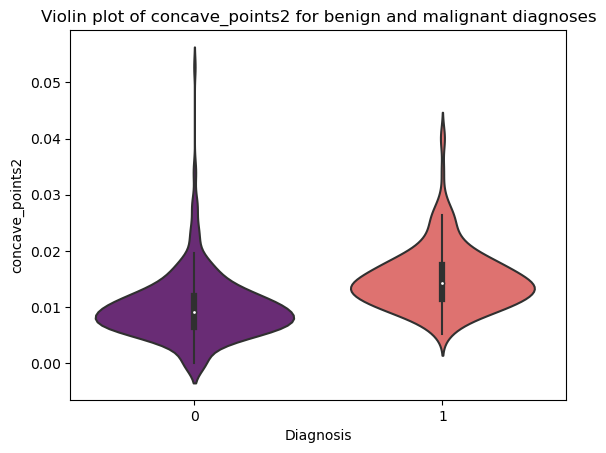

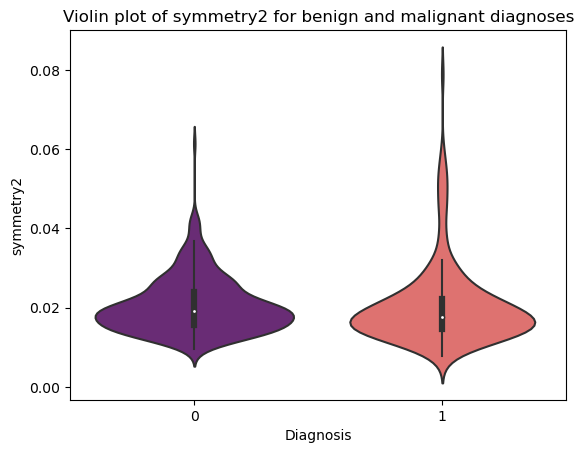

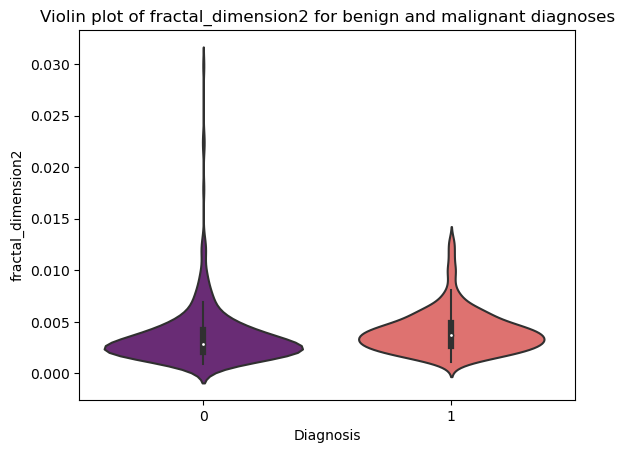

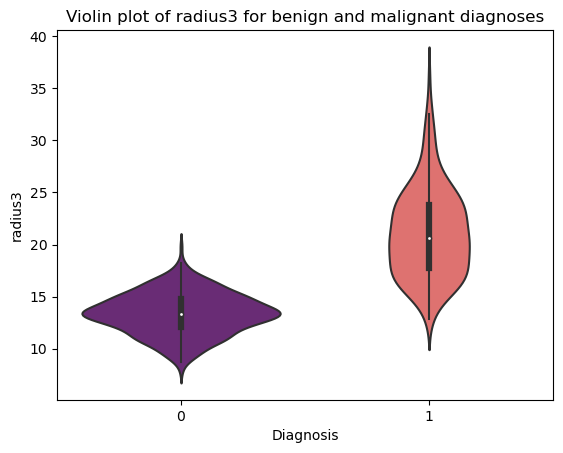

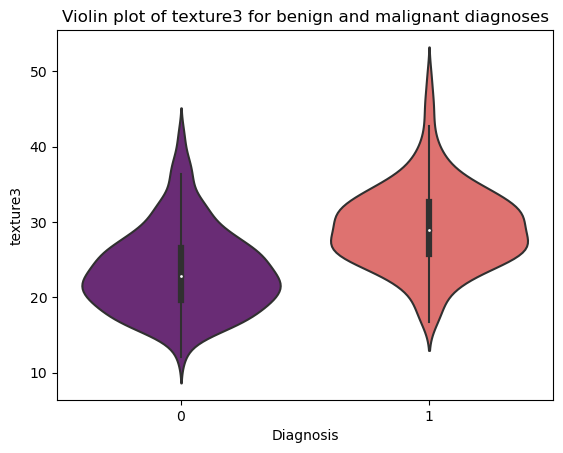

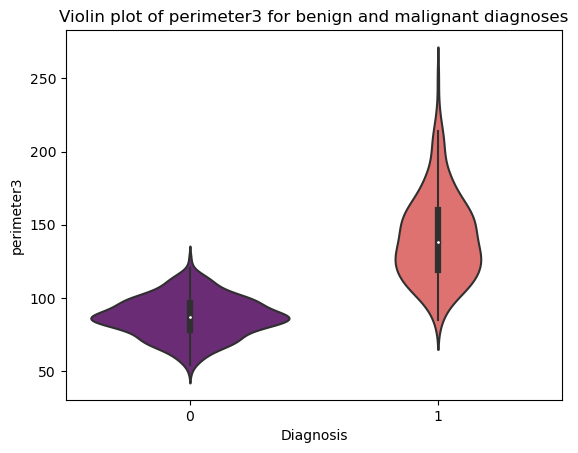

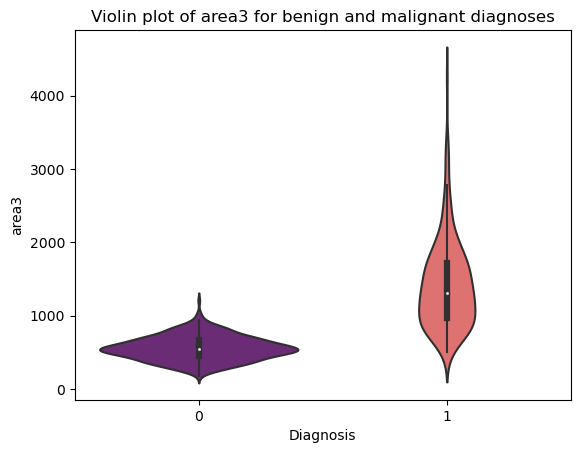

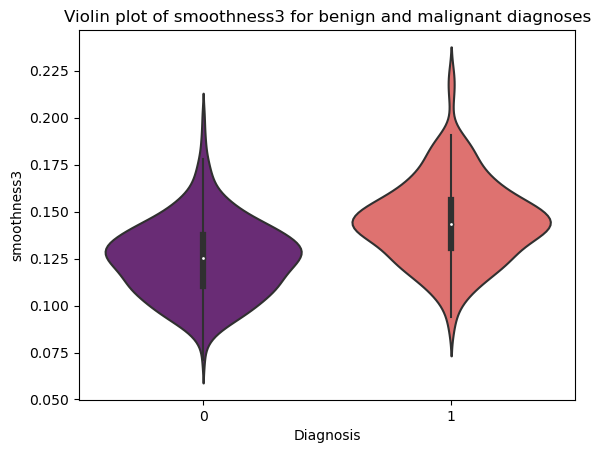

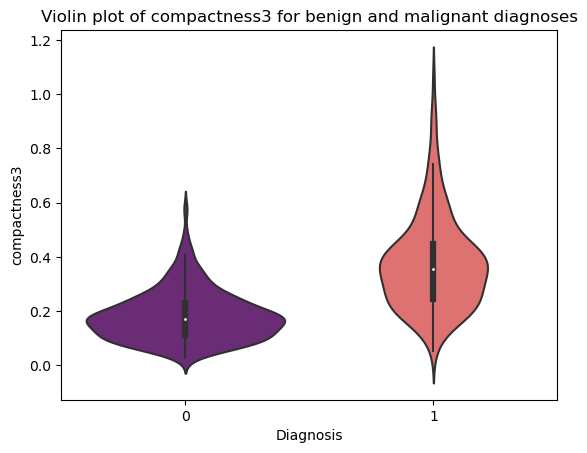

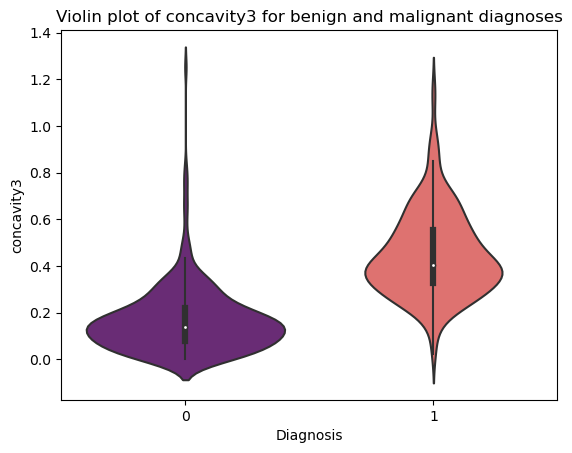

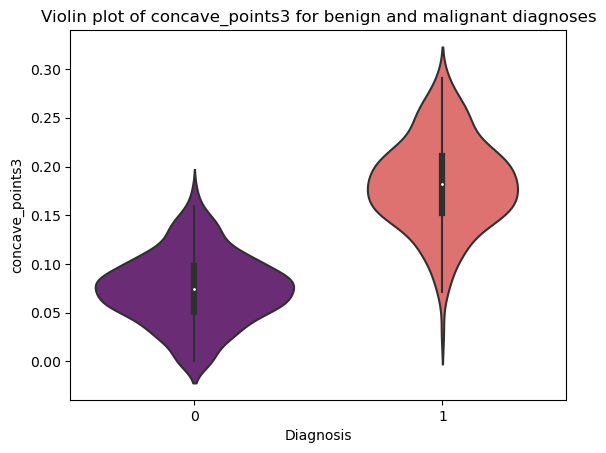

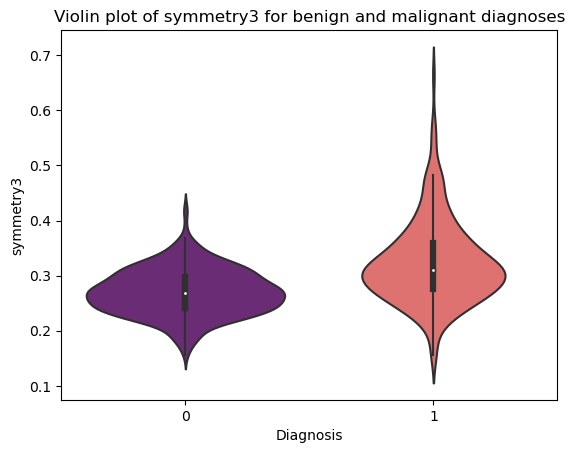

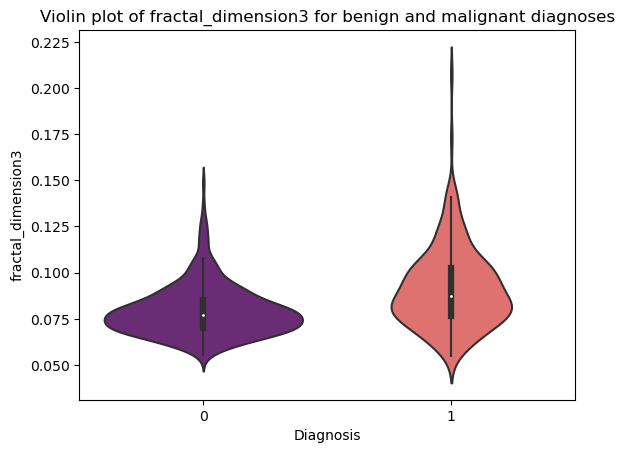

In [34]:
# creating violin plots for all the features, comparing the distribution of values for benign and malignant diagnoses 

plt.figure(figsize=(15, 8))
for feature in features_to_plot:
    sns.violinplot(x='Diagnosis', y=feature, data=df, palette='magma')
    plt.title(f'Violin plot of {feature} for benign and malignant diagnoses')
    plt.show()